In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as Profiling
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.palettes import diverging_palette, Reds256, Blues256
output_notebook()
rents= pd.read_csv('london_merged.csv')


Loading BokehJS ...

In [17]:
#print(rents.columns)
#print(rents.info())
#print(rents.isnull().sum())


with pd.option_context('display.max_columns', 15):
    print(rents.describe())
    


                cnt            t1            t2           hum    wind_speed  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean    1143.101642     12.468091     11.520836     72.324954     15.913063   
std     1085.108068      5.571818      6.615145     14.313186      7.894570   
min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
25%      257.000000      8.000000      6.000000     63.000000     10.000000   
50%      844.000000     12.500000     12.500000     74.500000     15.000000   
75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
max     7860.000000     34.000000     34.000000    100.000000     56.500000   

       weather_code          Hour  
count  17414.000000  17414.000000  
mean       2.722752     11.513265  
std        2.341163      6.915893  
min        1.000000      0.000000  
25%        1.000000      6.000000  
50%        2.000000     12.000000  
75%        3.000000     18.000000  


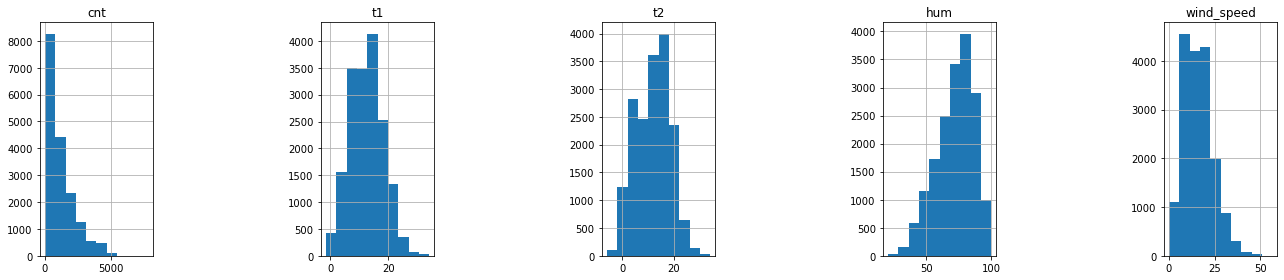

In [37]:
fig,a =  plt.subplots(1,5)
rents["cnt"].hist(ax=a[0])
rents["t1"].hist(ax=a[1])
rents["t2"].hist(ax=a[2])
rents["hum"].hist(ax=a[3])
rents["wind_speed"].hist(ax=a[4])
a[0].set(title="cnt")
a[1].set(title="t1")
a[2].set(title="t2")
a[3].set(title="hum")
a[4].set(title="wind_speed")
plt.tight_layout()
plt.gcf().set_size_inches(20,4)
plt.show()

In [2]:
profile = Profiling.ProfileReport(rents)
profile

cnt             1.000000
t1              0.388798
t2              0.369035
wind_speed      0.116295
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
weather_code   -0.166633
hum            -0.462901
Name: cnt, dtype: float64


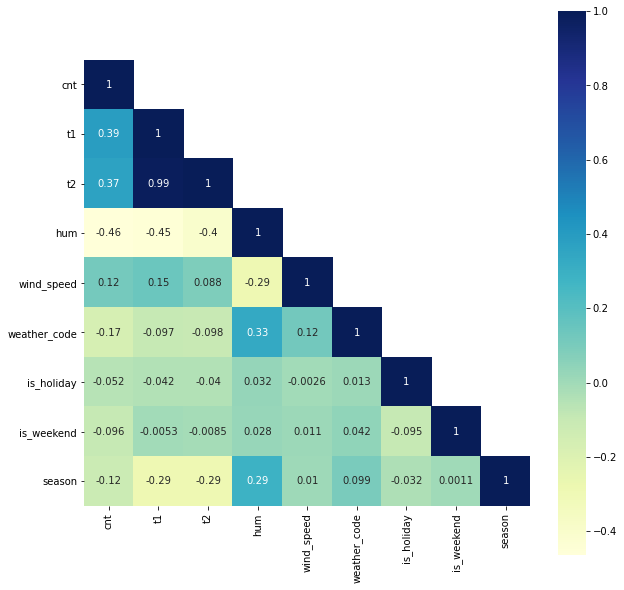

In [3]:
correlation = rents.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")
print(correlation['cnt'].sort_values(ascending=False))

In [2]:
rents[['Day','Hour']] = rents.timestamp.str.split(expand=True)
rents[['Year','Month','Day2']] = rents.Day.str.split("-",expand=True)
rents.head(2)

timestamp  cnt   t1   t2   hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   

   is_holiday  is_weekend  season         Day      Hour  Year Month Day2  
0         0.0         1.0     3.0  2015-01-04  00:00:00  2015    01   04  
1         0.0         1.0     3.0  2015-01-04  01:00:00  2015    01   04

In [3]:
rents['Hour'] = rents['Hour'].replace(['00:00:00','01:00:00','02:00:00','03:00:00','04:00:00','05:00:00','06:00:00','07:00:00','08:00:00','09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00'],['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
rents['is_weekend'] = rents['is_weekend'].replace([1,0],['yes','no'])
rents['is_holiday'] = rents['is_holiday'].replace([1,0],['yes','no'])
rents['season'] = rents['season'].replace([0,1,2,3],['Spring' ,'Summer', 'Autumn', 'Winter'])
rents['Month'] = rents['Month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan.','Febr.','Mar.','April','May','June','July','Aug.','Sept.','Oct.','Nov.','Dec.'])
rents['Hour']=pd.to_numeric(rents['Hour'])
rents.head(2)

timestamp  cnt   t1   t2   hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   

  is_holiday is_weekend  season         Day  Hour  Year Month Day2  
0         no        yes  Winter  2015-01-04     0  2015  Jan.   04  
1         no        yes  Winter  2015-01-04     1  2015  Jan.   04

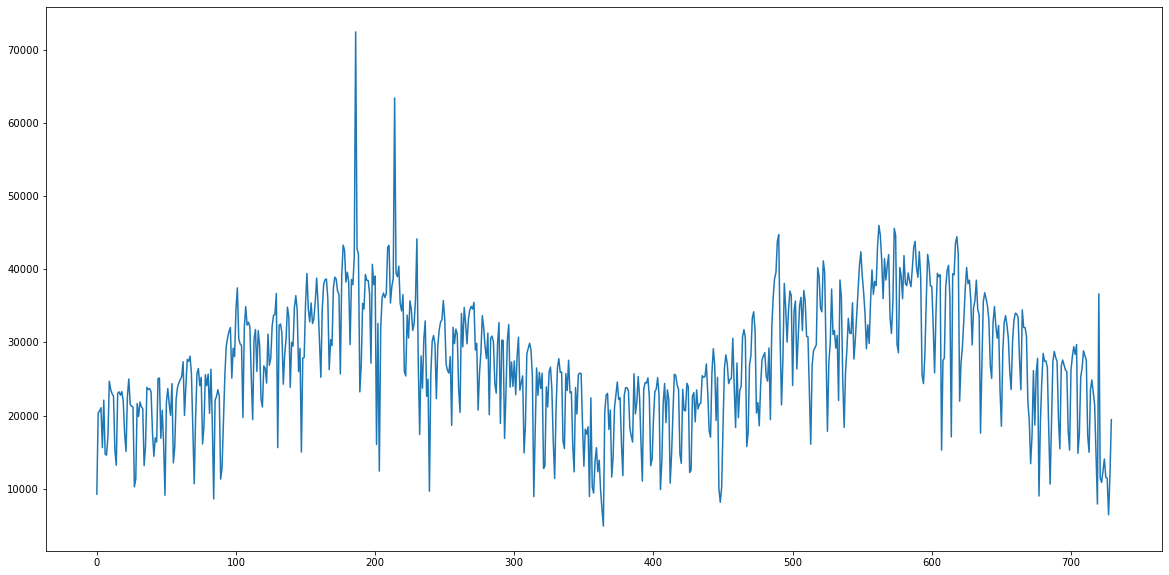

In [4]:
days = rents.groupby("Day")["cnt"].sum()
plt.plot(np.arange(len(days)),days)
plt.gcf().set_size_inches(20,10)
plt.show()

In [6]:
summ= rents.groupby("Day")["cnt"].sum()
tops=summ.nlargest(3)
#3 kiugró nap: 
#2015-07-09 London metró sztrájk
#2015-08-06 London metró sztrájk
#2016-07-19  ???

#másik sztrájk: 2016 március 23
print(tops)
print("decemberi metró sztárjk: ")
print(rents.loc[rents["Day"]=="2016-03-23", "cnt"].sum())


Day
2015-07-09    72504
2015-08-06    63468
2016-07-19    46021
Name: cnt, dtype: int64
decemberi metró sztárjk: 
26837


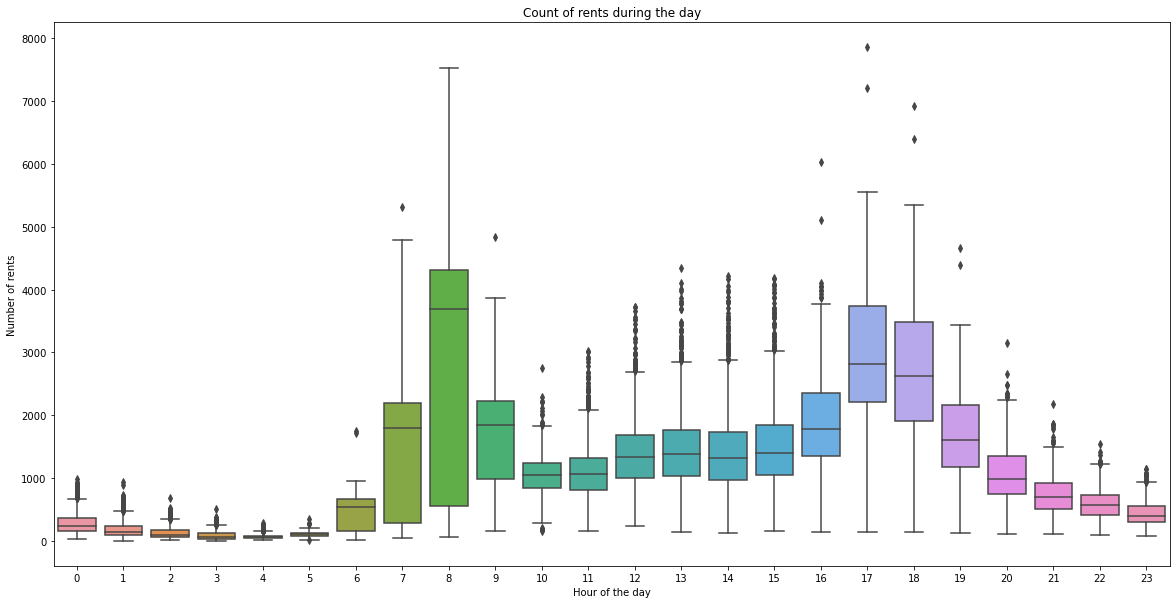

In [8]:
bx1 = sns.boxplot(x="Hour", y= "cnt",data= rents)
bx1.set(xlabel='Hour of the day', ylabel='Number of rents', title='Count of rents during the day')
plt.gcf().set_size_inches(20,10)


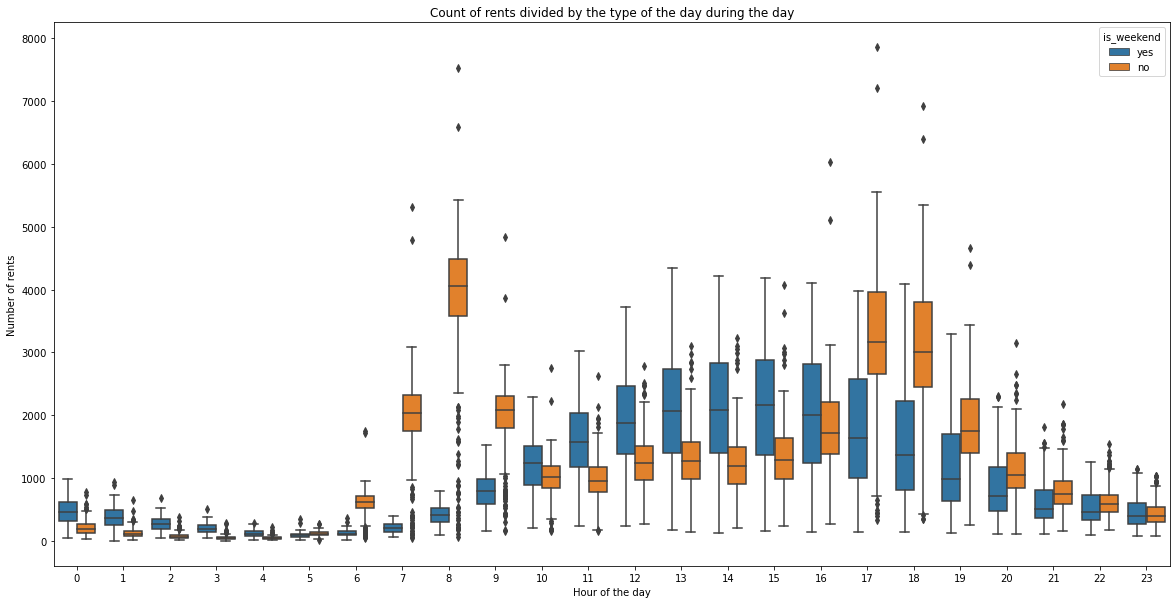

In [9]:
bx2 = sns.boxplot(x="Hour", y= "cnt",hue="is_weekend",data= rents)
bx2.set(xlabel='Hour of the day', ylabel='Number of rents', title='Count of rents divided by the type of the day during the day')
plt.gcf().set_size_inches(20,10)

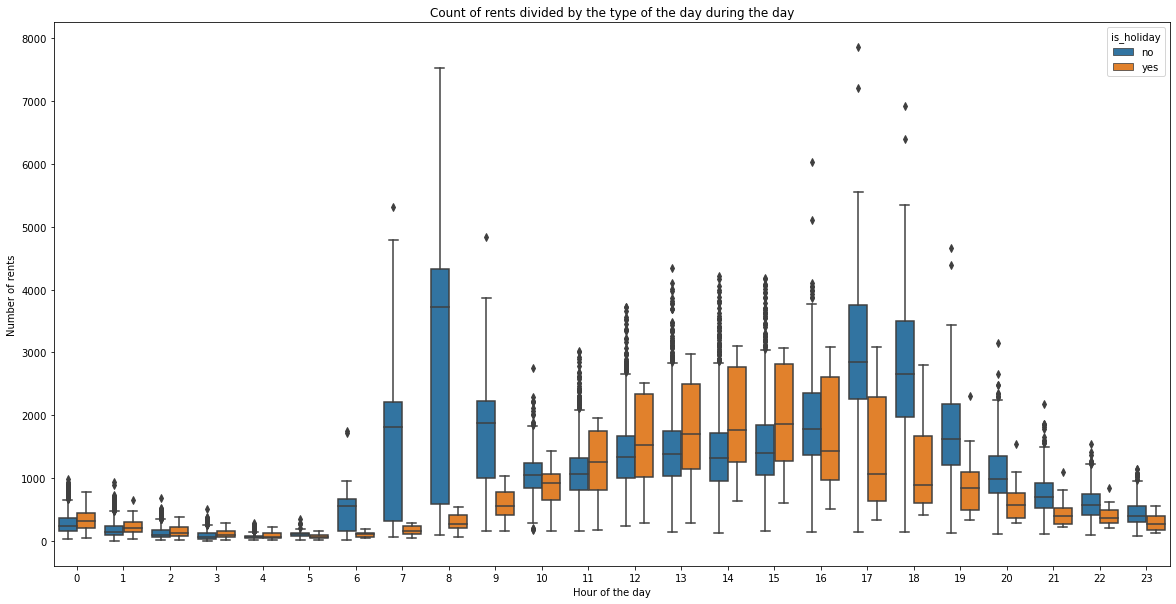

In [11]:
bx2 = sns.boxplot(x="Hour", y= "cnt",hue="is_holiday",data= rents)
bx2.set(xlabel='Hour of the day', ylabel='Number of rents', title='Count of rents divided by the type of the day during the day')
plt.gcf().set_size_inches(20,10)

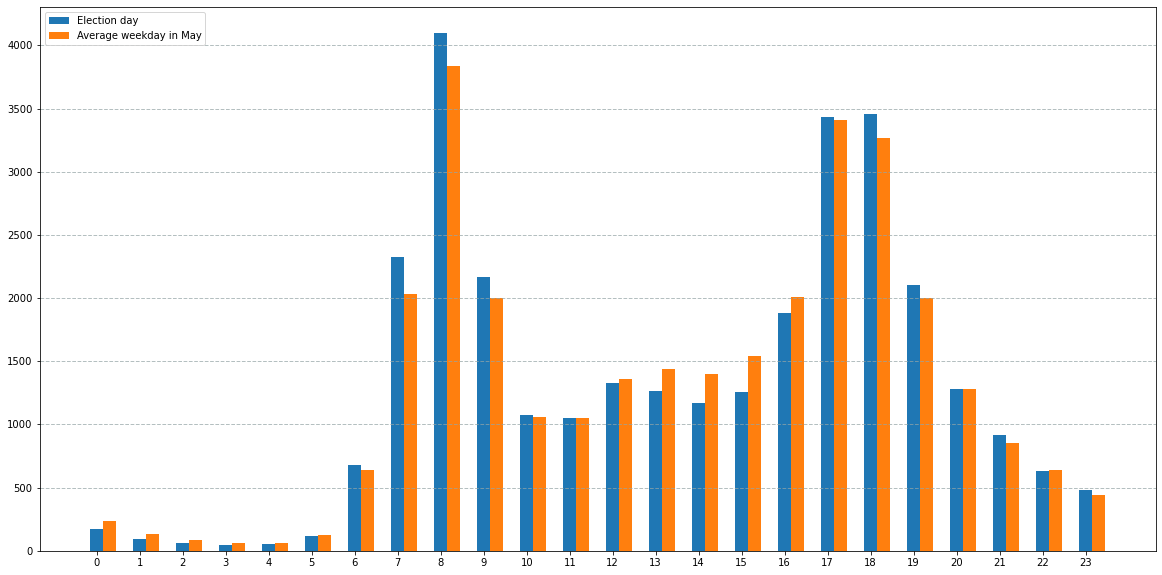

In [12]:
day=rents.loc[rents["Day"] == "2015-05-07", 'cnt'] #választás
mean=rents.loc[((rents["Month"] == "May") & (rents["is_weekend"]=="no"))].groupby("Hour")["cnt"].mean()
plt.bar(np.arange(len(day)),day,width=width)
plt.bar(np.arange(len(mean))+width,mean,width=width)
hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks(range(len(hours)), hours)
plt.gcf().set_size_inches(20,10)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
legend=["Election day", "Average weekday in May"]
plt.legend(legend,loc=2)
plt.show()

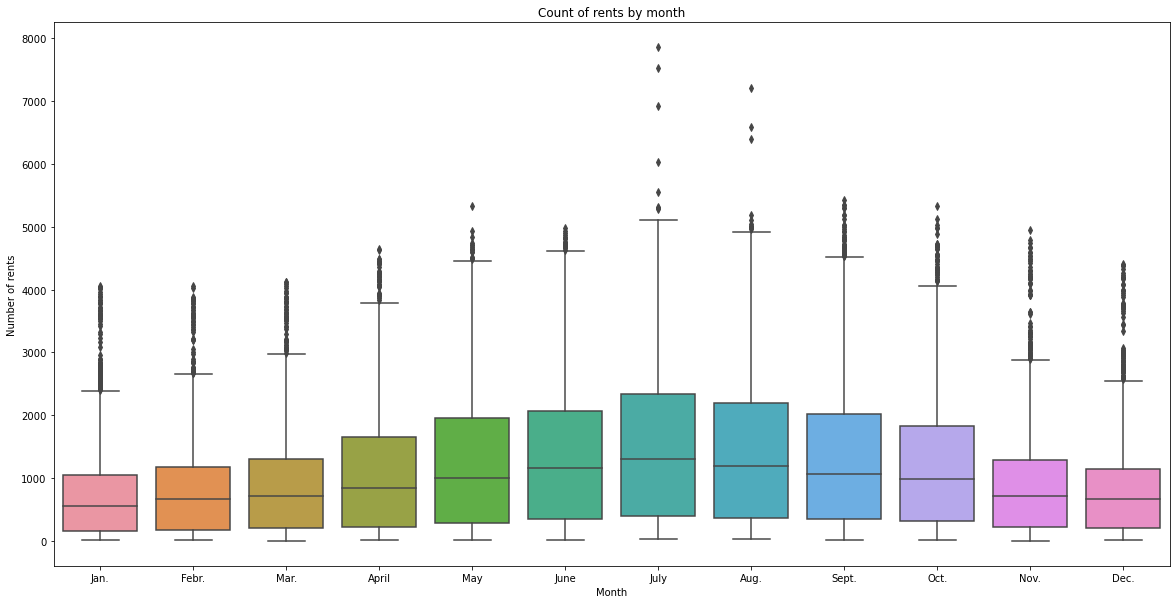

In [13]:
bx1 = sns.boxplot(x="Month", y= "cnt",data= rents)
bx1.set(xlabel='Month', ylabel='Number of rents', title='Count of rents by month')
plt.gcf().set_size_inches(20,10)

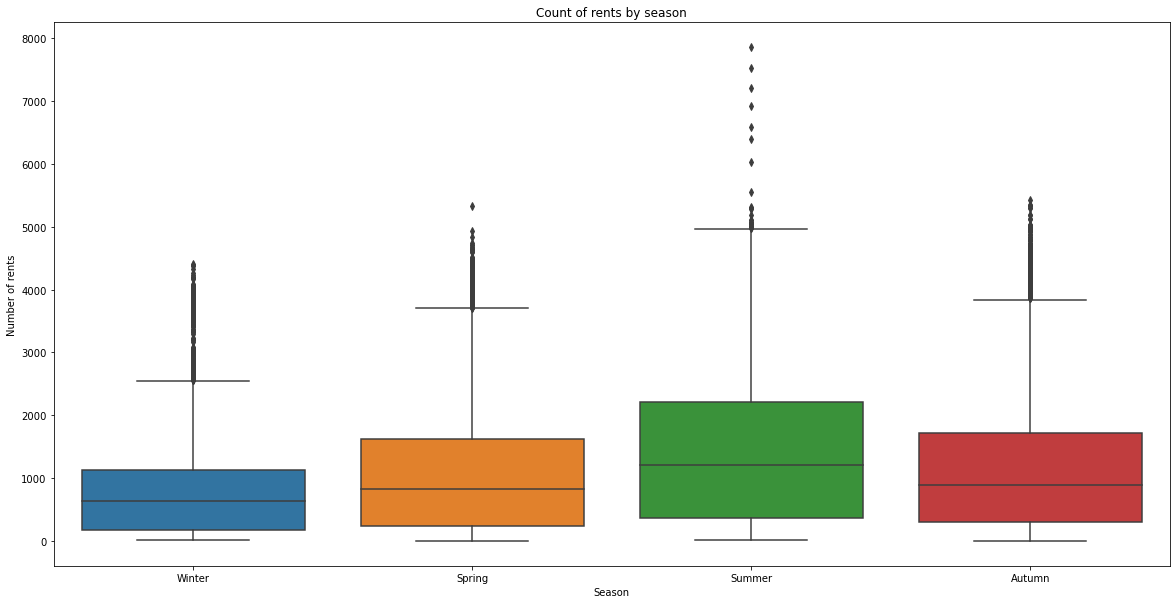

In [14]:
bx1 = sns.boxplot(x="season", y= "cnt",data= rents)
bx1.set(xlabel='Season', ylabel='Number of rents', title='Count of rents by season')
plt.gcf().set_size_inches(20,10)

In [4]:
conditions1 = [(rents['t1'] >=21),(rents['t1'] <= 15)]
rating = ['hot', 'cold']
rents['t1_category'] = np.select(conditions1, rating, default='warm')

conditions2 = [(rents['wind_speed'] >=25),(rents['wind_speed'] <= 15)]
rating = ['strong', 'calm']
rents['wind_speed_category'] = np.select(conditions2, rating, default='mild')

conditions3 = [(rents['hum'] >=70),(rents['hum'] <= 50)]
rating = ['high', 'low']
rents['hum_category'] = np.select(conditions1, rating, default='medium')

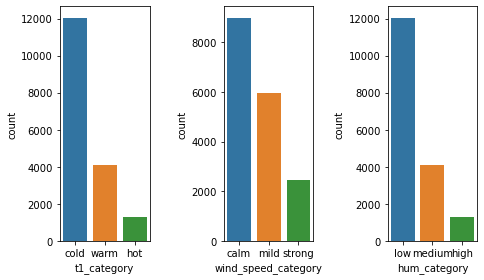

In [16]:
fig,a =  plt.subplots(1,3)
sns.countplot(x='t1_category',data=rents, ax=a[0])
sns.countplot(x='wind_speed_category',data=rents, ax=a[1])
sns.countplot(x='hum_category',data=rents, ax=a[2])
plt.tight_layout()
plt.gcf().set_size_inches(7,4)

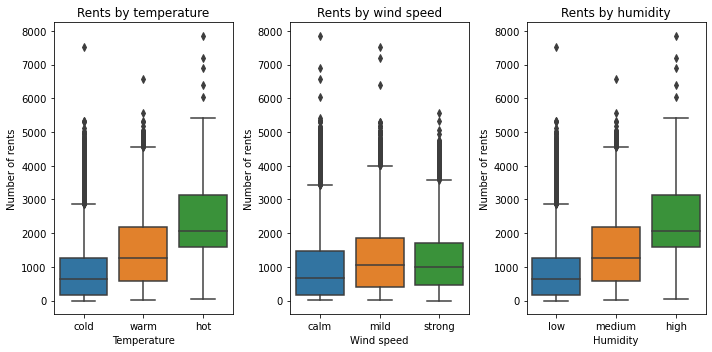

In [13]:
fig,a =  plt.subplots(1,3)
bx1 = sns.boxplot(x="t1_category", y= "cnt",data= rents, ax=a[0])
bx1.set(xlabel='Temperature', ylabel='Number of rents', title='Rents by temperature')
bx1 = sns.boxplot(x="wind_speed_category", y= "cnt",data= rents, ax=a[1])
bx1.set(xlabel='Wind speed',  ylabel='Number of rents',title='Rents by wind speed')
bx1 = sns.boxplot(x="hum_category", y= "cnt",data= rents, ax=a[2])
bx1.set(xlabel='Humidity', ylabel='Number of rents',title='Rents by humidity')
plt.gcf().set_size_inches(10,5)
plt.tight_layout()

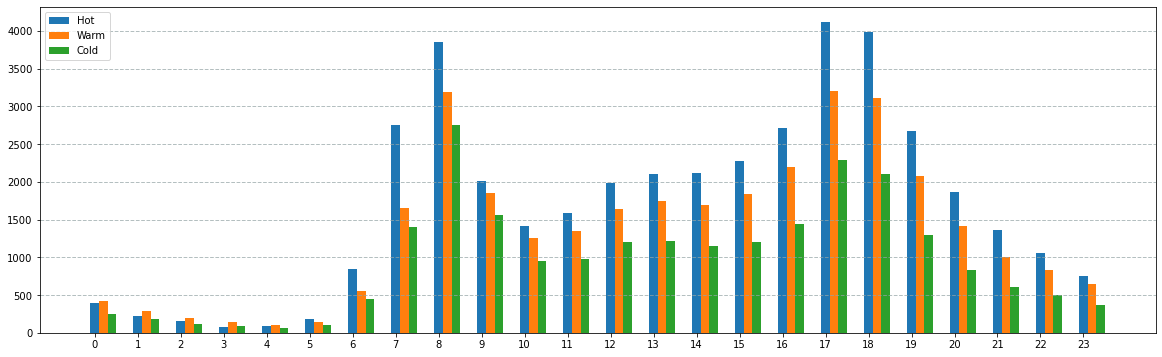

In [10]:
width= 0.2
hot=rents.loc[rents["t1_category"] == "hot"].groupby("Hour")["cnt"].mean()
warm=rents.loc[rents["t1_category"] == "warm"].groupby("Hour")["cnt"].mean()
cold=rents.loc[rents["t1_category"] == "cold"].groupby("Hour")["cnt"].mean()
plt.bar(np.arange(len(hot)),hot,width=width)
plt.bar(np.arange(len(warm))+width,warm,width=width)
plt.bar(np.arange(len(cold))+width*2,cold,width=width)
hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks(range(len(hot)), hours)
legend=["Hot", "Warm","Cold"]
plt.legend(legend,loc=2)
plt.title("Átlagos bérlések eloszlása hőmérséklet alapján bontva")
plt.gcf().set_size_inches(20,6)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

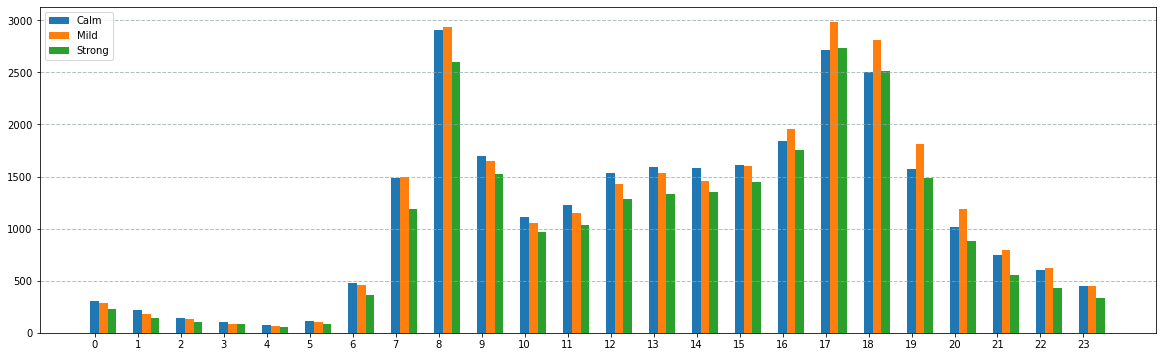

In [19]:
calm=rents.loc[rents["wind_speed_category"] == "calm"].groupby("Hour")["cnt"].mean()
mild=rents.loc[rents["wind_speed_category"] == "mild"].groupby("Hour")["cnt"].mean()
strong=rents.loc[rents["wind_speed_category"] == "strong"].groupby("Hour")["cnt"].mean()
plt.bar(np.arange(len(calm)),calm,width=width)
plt.bar(np.arange(len(mild))+width,mild,width=width)
plt.bar(np.arange(len(strong))+width*2,strong,width=width)
plt.xticks(range(len(strong)), hours)
legend=["Calm", "Mild","Strong"]
plt.legend(legend,loc=2)
plt.gcf().set_size_inches(20,6)
plt.title("Átlagos bérlések eloszlása szélerősség alapján bontva")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

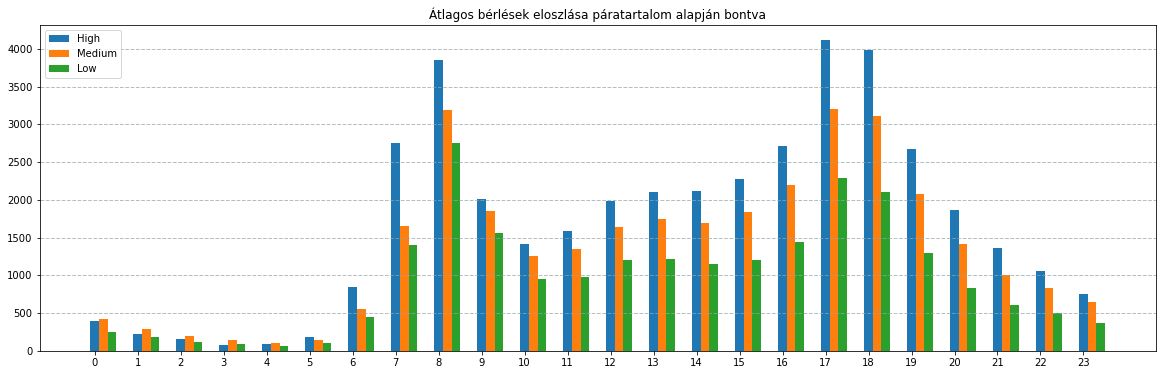

In [14]:
high=rents.loc[rents["hum_category"] == "high"].groupby("Hour")["cnt"].mean()
medium=rents.loc[rents["hum_category"] == "medium"].groupby("Hour")["cnt"].mean()
low=rents.loc[rents["hum_category"] == "low"].groupby("Hour")["cnt"].mean()
plt.bar(np.arange(len(high)),high,width=width)
plt.bar(np.arange(len(medium))+width,medium,width=width)
plt.bar(np.arange(len(low))+width*2,low,width=width)
plt.xticks(range(len(high)), hours)
legend=["High", "Medium","Low"]
plt.legend(legend,loc=2)
plt.gcf().set_size_inches(20,6)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.title("Átlagos bérlések eloszlása páratartalom alapján bontva")
plt.show()

In [5]:
p= figure(title="Óra és bérések száma, érzéket hőmérséklet szerint színezve",tools="wheel_zoom,reset")
base_colors=diverging_palette(Reds256,Blues256,41,0.65)[::-1]
t2_round=[round(x) for x in rents.t2]
colors = [base_colors[x+6] for x in t2_round]
p.scatter(rents.Hour,rents.cnt,fill_color=colors,line_color=None)
show(p)